# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [119]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [130]:
each_city = 0
wait_time = 0
xcities = len(cities)
city_list = cities
jsnlist = []
while each_city < xcities:
    xcity = cities[each_city]
    url = f'http://api.openweathermap.org/data/2.5/weather?q={xcity}&units=imperial&APPID={weather_api_key}'
    jsn = requests.get(url).json()
    try: 
#         print('City-{0}: {1}'.format(each_city, jsn['city']))
        print(jsn)
        cityname = jsn['name']
        lat_city = jsn['coord']['lat']
        lon_city = jsn['coord']['lon']
        max_temp = jsn['main']['temp_max']
        humidity = jsn['main']['humidity']
        cloud = jsn['clouds']['all']
        wind_sp = jsn['wind']['speed']
        country_name = jsn['sys']['country']
        date_city = jsn['dt'] 
        city_di = {'City_name':cityname,'Lat':lat_city,'Lng':lon_city,'Max_temp':max_temp,'Humidity':humidity,'Cloudiness':cloud,'Wind_Speed':wind_sp,'Country':country_name,'Date':date_city}
        jsnlist.append(city_di)
        wait_time = 0
    except:
        wait_time = wait_time + 1
        print(f'Waiting {wait_time} seconds')
        time.sleep(1)
    each_city = each_city + 1


{'coord': {'lon': -111.101, 'lat': 30.5838}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 85.89, 'feels_like': 82.63, 'temp_min': 85.89, 'temp_max': 85.89, 'pressure': 1010, 'humidity': 8, 'sea_level': 1010, 'grnd_level': 934}, 'visibility': 10000, 'wind': {'speed': 11.74, 'deg': 218, 'gust': 10.67}, 'clouds': {'all': 5}, 'dt': 1619300631, 'sys': {'country': 'MX', 'sunrise': 1619268411, 'sunset': 1619315865}, 'timezone': -25200, 'id': 3996893, 'name': 'Caborca', 'cod': 200}
{'coord': {'lon': -68.5145, 'lat': 63.7506}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32, 'feels_like': 28.72, 'temp_min': 32, 'temp_max': 32, 'pressure': 1012, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1619300793, 'sys': {'type': 1, 'id': 797, 'country': 'CA', 'sunrise': 1619253094, 'sunset':

{'coord': {'lon': -70.9167, 'lat': -53.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.39, 'feels_like': 48.96, 'temp_min': 51.01, 'temp_max': 51.8, 'pressure': 1009, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1619300742, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1619264842, 'sunset': 1619300147}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
{'coord': {'lon': 147.3294, 'lat': -42.8794}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 48.36, 'feels_like': 44.29, 'temp_min': 46, 'temp_max': 50, 'pressure': 1019, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 330}, 'clouds': {'all': 40}, 'dt': 1619300654, 'sys': {'type': 1, 'id': 9545, 'country': 'AU', 'sunrise': 1619297627, 'sunset': 1619335396}, 'tim

{'coord': {'lon': 12.6934, 'lat': 67.667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 36.37, 'feels_like': 24.91, 'temp_min': 36.37, 'temp_max': 36.37, 'pressure': 1028, 'humidity': 68, 'sea_level': 1028, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 23.38, 'deg': 6, 'gust': 23.82}, 'clouds': {'all': 80}, 'dt': 1619300684, 'sys': {'country': 'NO', 'sunrise': 1619232025, 'sunset': 1619292837}, 'timezone': 7200, 'id': 3137469, 'name': 'Sørland', 'cod': 200}
{'coord': {'lon': 26.891, 'lat': -33.5906}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.4, 'feels_like': 66.78, 'temp_min': 66.4, 'temp_max': 66.4, 'pressure': 1015, 'humidity': 86, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 8.01, 'deg': 30, 'gust': 9.69}, 'clouds': {'all': 69}, 'dt': 1619300371, 'sys': {'country': '

{'coord': {'lon': -114.3525, 'lat': 62.456}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.13, 'feels_like': 6.87, 'temp_min': 19, 'temp_max': 19.4, 'pressure': 1014, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 330, 'gust': 20.71}, 'clouds': {'all': 75}, 'dt': 1619300890, 'sys': {'type': 1, 'id': 1007, 'country': 'CA', 'sunrise': 1619264495, 'sunset': 1619321341}, 'timezone': -21600, 'id': 6185377, 'name': 'Yellowknife', 'cod': 200}
{'coord': {'lon': -25.4333, 'lat': 37.7167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 58.46, 'temp_min': 59, 'temp_max': 59, 'pressure': 1012, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1619300890, 'sys': {'type': 1, 'id': 6899, 'country': 'PT', 'sunrise': 1619247258, 'sunset': 1619295

{'coord': {'lon': 40.5756, 'lat': 45.4375}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 46.76, 'feels_like': 44.64, 'temp_min': 46.76, 'temp_max': 46.76, 'pressure': 1023, 'humidity': 73, 'sea_level': 1023, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.68, 'deg': 233, 'gust': 6.85}, 'clouds': {'all': 96}, 'dt': 1619300896, 'sys': {'country': 'RU', 'sunrise': 1619316916, 'sunset': 1619367343}, 'timezone': 10800, 'id': 540761, 'name': 'Kropotkin', 'cod': 200}
{'coord': {'lon': -139.0333, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 80.78, 'feels_like': 84.56, 'temp_min': 80.78, 'temp_max': 80.78, 'pressure': 1012, 'humidity': 72, 'sea_level': 1012, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 16.58, 'deg': 85, 'gust': 18.79}, 'clouds': {'all': 4}, 'dt': 1619300673, 'sys': {'country'

{'coord': {'lon': -41.4669, 'lat': -7.0769}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.04, 'feels_like': 82.78, 'temp_min': 80.04, 'temp_max': 80.04, 'pressure': 1010, 'humidity': 68, 'sea_level': 1010, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 2.68, 'deg': 54, 'gust': 6.17}, 'clouds': {'all': 99}, 'dt': 1619300904, 'sys': {'country': 'BR', 'sunrise': 1619254015, 'sunset': 1619296841}, 'timezone': -10800, 'id': 3392167, 'name': 'Picos', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
Waiting 1 seconds
{'coord': {'lon': -16.3333, 'lat': 33.0833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 62.19, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1008, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 280}, 'clouds': {'all': 20}, 'dt': 1619300728, 'sys': {'

{'coord': {'lon': 178.4167, 'lat': 69.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.58, 'feels_like': 23.14, 'temp_min': 28.58, 'temp_max': 28.58, 'pressure': 1009, 'humidity': 83, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.92, 'deg': 111, 'gust': 5.39}, 'clouds': {'all': 100}, 'dt': 1619300911, 'sys': {'country': 'RU', 'sunrise': 1619277528, 'sunset': 1619340575}, 'timezone': 43200, 'id': 2123814, 'name': 'Leningradskiy', 'cod': 200}
{'coord': {'lon': 54.0924, 'lat': 17.0151}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.66, 'feels_like': 86.43, 'temp_min': 81.66, 'temp_max': 81.66, 'pressure': 1010, 'humidity': 73, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.86, 'deg': 202, 'gust': 7.58}, 'clouds': {'all': 68}, 'dt': 1619300912, 'sys

{'coord': {'lon': -99.8901, 'lat': 16.8634}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 91.83, 'temp_min': 86, 'temp_max': 86, 'pressure': 1008, 'humidity': 62}, 'visibility': 9656, 'wind': {'speed': 9.22, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 1619300917, 'sys': {'type': 1, 'id': 7103, 'country': 'MX', 'sunrise': 1619266668, 'sunset': 1619312227}, 'timezone': -18000, 'id': 3533462, 'name': 'Acapulco de Juárez', 'cod': 200}
{'coord': {'lon': 24.6667, 'lat': 14.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.02, 'feels_like': 78.35, 'temp_min': 80.02, 'temp_max': 80.02, 'pressure': 1009, 'humidity': 15, 'sea_level': 1009, 'grnd_level': 886}, 'visibility': 10000, 'wind': {'speed': 9.06, 'deg': 43, 'gust': 16.93}, 'clouds': {'all': 93}, 'dt': 1619300918, 'sys': {'country': 'SD', 'sunrise': 1619236948

{'coord': {'lon': 78.9333, 'lat': 16.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 83.73, 'feels_like': 86.34, 'temp_min': 83.73, 'temp_max': 83.73, 'pressure': 1007, 'humidity': 57, 'sea_level': 1007, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 5.21, 'deg': 114, 'gust': 7.76}, 'clouds': {'all': 5}, 'dt': 1619300924, 'sys': {'country': 'IN', 'sunrise': 1619310143, 'sunset': 1619355707}, 'timezone': 19800, 'id': 1273109, 'name': 'Devarkonda', 'cod': 200}
{'coord': {'lon': 131.2333, 'lat': 31.4583}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 52.9, 'feels_like': 52.3, 'temp_min': 51.8, 'temp_max': 53.6, 'pressure': 1015, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 280}, 'clouds': {'all': 20}, 'dt': 1619300924, 'sys': {'type': 1, 'id': 8001, 'country': 'JP', 'sunrise': 1619296561, 'sunset':

{'coord': {'lon': -76.8895, 'lat': 18.3685}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.05, 'feels_like': 90.81, 'temp_min': 82, 'temp_max': 84, 'pressure': 1011, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 74, 'gust': 4}, 'clouds': {'all': 62}, 'dt': 1619300929, 'sys': {'type': 3, 'id': 2026800, 'country': 'JM', 'sunrise': 1619261057, 'sunset': 1619306800}, 'timezone': -18000, 'id': 3488985, 'name': 'Port Maria', 'cod': 200}
{'coord': {'lon': 25.5701, 'lat': -33.918}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.6, 'feels_like': 53.37, 'temp_min': 53.6, 'temp_max': 53.6, 'pressure': 1015, 'humidity': 100}, 'visibility': 9000, 'wind': {'speed': 4.61, 'deg': 260}, 'clouds': {'all': 87}, 'dt': 1619300784, 'sys': {'type': 1, 'id': 1973, 'country': 'ZA', 'sunrise': 1619239619, 'sunset': 16192

{'coord': {'lon': 46.7102, 'lat': 43.919}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.42, 'feels_like': 51.62, 'temp_min': 53.42, 'temp_max': 53.42, 'pressure': 1020, 'humidity': 67, 'sea_level': 1020, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 2.33, 'deg': 155, 'gust': 2.51}, 'clouds': {'all': 58}, 'dt': 1619300934, 'sys': {'country': 'RU', 'sunrise': 1619315629, 'sunset': 1619365687}, 'timezone': 10800, 'id': 797213, 'name': 'Pervomayskoye', 'cod': 200}
{'coord': {'lon': 24.7314, 'lat': -34.0033}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 58.96, 'temp_min': 59, 'temp_max': 59, 'pressure': 1015, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 231, 'gust': 1.99}, 'clouds': {'all': 83}, 'dt': 1619300935, 'sys': {'type': 3, 'id': 2035063, 'country': 'ZA', 'sunri

{'coord': {'lon': 16.8315, 'lat': 68.3428}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 32, 'feels_like': 27.45, 'temp_min': 32, 'temp_max': 32, 'pressure': 1026, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 350}, 'clouds': {'all': 90}, 'dt': 1619300940, 'sys': {'type': 1, 'id': 1614, 'country': 'NO', 'sunrise': 1619230681, 'sunset': 1619292195}, 'timezone': 7200, 'id': 3162108, 'name': 'Ballangen', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
Waiting 1 seconds
{'coord': {'lon': 152.4333, 'lat': -3.6667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 81.99, 'feels_like': 87.55, 'temp_min': 81.99, 'temp_max': 81.99, 'pressure': 1012, 'humidity': 75, 'sea_level': 1012, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 6.6, 'deg': 71, 'gust': 10.45}, 'clouds': {'all': 32}, 'dt

{'coord': {'lon': -54.3333, 'lat': -34.4833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 63.57, 'feels_like': 64, 'temp_min': 63.57, 'temp_max': 63.57, 'pressure': 1012, 'humidity': 93, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 228, 'gust': 22.06}, 'clouds': {'all': 100}, 'dt': 1619300952, 'sys': {'country': 'UY', 'sunrise': 1619258851, 'sunset': 1619298180}, 'timezone': -10800, 'id': 3440777, 'name': 'Rocha', 'cod': 200}
{'coord': {'lon': 82.4667, 'lat': 65.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.12, 'feels_like': 23.27, 'temp_min': 31.12, 'temp_max': 31.12, 'pressure': 1027, 'humidity': 96, 'sea_level': 1027, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 8.84, 'deg': 335, 'gust': 14.9}, 'clouds': {'all': 100}, 'dt': 1619300952, 'sys': {'cou

{'coord': {'lon': -159.775, 'lat': -21.2078}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 86.97, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1013, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 50}, 'clouds': {'all': 40}, 'dt': 1619300706, 'sys': {'type': 1, 'id': 7271, 'country': 'CK', 'sunrise': 1619283239, 'sunset': 1619324397}, 'timezone': -36000, 'id': 4035715, 'name': 'Avarua', 'cod': 200}
{'coord': {'lon': -57.6152, 'lat': 47.6167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 36.68, 'feels_like': 27.28, 'temp_min': 36.68, 'temp_max': 36.68, 'pressure': 1004, 'humidity': 88, 'sea_level': 1004, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 15.93, 'deg': 269, 'gust': 22.3}, 'clouds': {'all': 54}, 'dt': 1619300957, 'sys': {'country': 'CA', 'sunrise': 16192

{'coord': {'lon': -70.75, 'lat': -33.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 71.47, 'feels_like': 69.78, 'temp_min': 68, 'temp_max': 73.4, 'pressure': 1017, 'humidity': 31}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1619300962, 'sys': {'type': 1, 'id': 8506, 'country': 'CL', 'sunrise': 1619262734, 'sunset': 1619302176}, 'timezone': -14400, 'id': 3897774, 'name': 'Buin', 'cod': 200}
{'coord': {'lon': -90.7195, 'lat': 29.5958}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.27, 'feels_like': 87.91, 'temp_min': 80.6, 'temp_max': 84, 'pressure': 1009, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 240, 'gust': 20.71}, 'clouds': {'all': 90}, 'dt': 1619300962, 'sys': {'type': 1, 'id': 4444, 'country': 'US', 'sunrise': 1619263599, 'sunset': 1619310895}, 't

{'coord': {'lon': -34.8339, 'lat': -6.9811}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 78.8, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1012, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1619300968, 'sys': {'type': 1, 'id': 8391, 'country': 'BR', 'sunrise': 1619252418, 'sunset': 1619295254}, 'timezone': -10800, 'id': 3404558, 'name': 'Cabedelo', 'cod': 200}
{'coord': {'lon': 42.4509, 'lat': 18.3851}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 60.8, 'feels_like': 59.74, 'temp_min': 60.8, 'temp_max': 60.8, 'pressure': 1024, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 6.53, 'deg': 29, 'gust': 7.67}, 'clouds': {'all': 40}, 'dt': 1619300969, 'sys': {'type': 1, 'id': 7396, 'country': 'SA', 'sunrise': 1619318789, 'sunset': 1619364

{'coord': {'lon': 139.9242, 'lat': 53.9353}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.05, 'feels_like': 16.5, 'temp_min': 25.05, 'temp_max': 25.05, 'pressure': 1017, 'humidity': 73, 'sea_level': 1017, 'grnd_level': 971}, 'visibility': 10000, 'wind': {'speed': 7.83, 'deg': 308, 'gust': 15.97}, 'clouds': {'all': 65}, 'dt': 1619300973, 'sys': {'country': 'RU', 'sunrise': 1619291836, 'sunset': 1619344741}, 'timezone': 36000, 'id': 2019935, 'name': 'Mnogovershinnyy', 'cod': 200}
{'coord': {'lon': 97.75, 'lat': 22.9333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68.02, 'feels_like': 67.15, 'temp_min': 68.02, 'temp_max': 68.02, 'pressure': 1008, 'humidity': 56, 'sea_level': 1008, 'grnd_level': 914}, 'visibility': 10000, 'wind': {'speed': 1.48, 'deg': 53, 'gust': 1.39}, 'clouds': {'all': 25}, 'dt': 1619300974, 'sys': 

{'coord': {'lon': 97.2, 'lat': 40.2833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.54, 'feels_like': 45.54, 'temp_min': 45.54, 'temp_max': 45.54, 'pressure': 1017, 'humidity': 41, 'sea_level': 1017, 'grnd_level': 854}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 128, 'gust': 1.57}, 'clouds': {'all': 66}, 'dt': 1619300983, 'sys': {'country': 'CN', 'sunrise': 1619303922, 'sunset': 1619353161}, 'timezone': 28800, 'id': 1528998, 'name': 'Yumen', 'cod': 200}
{'coord': {'lon': 170.5036, 'lat': -45.8742}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 53.01, 'feels_like': 50.83, 'temp_min': 53.01, 'temp_max': 53.01, 'pressure': 1000, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 356, 'gust': 4}, 'clouds': {'all': 66}, 'dt': 1619300735, 'sys': {'type': 3, 'id': 75281, 'country': 'NZ', 'sunrise': 1

{'coord': {'lon': -73.15, 'lat': -40.5667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 62.13, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1021, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1619300989, 'sys': {'type': 1, 'id': 8490, 'country': 'CL', 'sunrise': 1619263892, 'sunset': 1619302169}, 'timezone': -14400, 'id': 3877949, 'name': 'Osorno', 'cod': 200}
{'coord': {'lon': 34.9766, 'lat': 57.419}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 34.48, 'feels_like': 27.1, 'temp_min': 34.48, 'temp_max': 34.48, 'pressure': 1004, 'humidity': 77, 'sea_level': 1004, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 9.42, 'deg': 283, 'gust': 24.65}, 'snow': {'1h': 0.421}, 'clouds': {'all': 100}, 'dt': 1619300990, 'sys': {'country': 'RU', 'sunrise': 

{'cod': '404', 'message': 'city not found'}
Waiting 2 seconds
{'coord': {'lon': 37, 'lat': 38}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 62.65, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1013, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 130}, 'clouds': {'all': 40}, 'dt': 1619301001, 'sys': {'type': 1, 'id': 7002, 'country': 'TR', 'sunrise': 1619318584, 'sunset': 1619367392}, 'timezone': 10800, 'id': 310858, 'name': 'Kahramanmaraş Province', 'cod': 200}
{'coord': {'lon': 29.1608, 'lat': 47.2631}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 44.26, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure': 1023, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 280}, 'clouds': {'all': 0}, 'dt': 1619301001, 'sys': {'type': 1, 'id': 7022, 'country'

{'coord': {'lon': -53.2648, 'lat': 47.5999}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.1, 'feels_like': 44.1, 'temp_min': 43, 'temp_max': 45, 'pressure': 1003, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 246, 'gust': 5.99}, 'clouds': {'all': 55}, 'dt': 1619301009, 'sys': {'type': 3, 'id': 2002737, 'country': 'CA', 'sunrise': 1619252835, 'sunset': 1619303682}, 'timezone': -9000, 'id': 5895424, 'name': 'Bay Roberts', 'cod': 200}
{'coord': {'lon': -157.7394, 'lat': 21.4022}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.46, 'feels_like': 79.05, 'temp_min': 75, 'temp_max': 82.4, 'pressure': 1020, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 70, 'gust': 24.16}, 'clouds': {'all': 40}, 'dt': 1619301009, 'sys': {'type': 1, 'id': 7877, 'country': 'US', 'sunrise': 16192802

{'coord': {'lon': -38.8828, 'lat': -15.8631}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 78.8, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1012, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1619301018, 'sys': {'type': 1, 'id': 8422, 'country': 'BR', 'sunrise': 1619253895, 'sunset': 1619295720}, 'timezone': -10800, 'id': 3470137, 'name': 'Belmonte', 'cod': 200}
{'coord': {'lon': 8.7815, 'lat': -0.7193}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 87.13, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1010, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 210}, 'clouds': {'all': 20}, 'dt': 1619301019, 'sys': {'type': 1, 'id': 2188, 'country': 'GA', 'sunrise': 1619241605, 'sunset': 1619285134}, 'timezone': 3

{'coord': {'lon': 50.8122, 'lat': 9.4942}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 82.78, 'feels_like': 89.85, 'temp_min': 82.78, 'temp_max': 82.78, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 108, 'gust': 6.17}, 'rain': {'1h': 0.23}, 'clouds': {'all': 74}, 'dt': 1619301025, 'sys': {'country': 'SO', 'sunrise': 1619317326, 'sunset': 1619362021}, 'timezone': 10800, 'id': 64814, 'name': 'Bandarbeyla', 'cod': 200}
{'coord': {'lon': -147.8028, 'lat': 64.8569}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 57.04, 'feels_like': 53.56, 'temp_min': 55.4, 'temp_max': 59, 'pressure': 1015, 'humidity': 24}, 'visibility': 10000, 'wind': {'speed': 1.43, 'deg': 70, 'gust': 3.36}, 'rain': {'1h': 0.51, '3h': 0.76}, 'clouds': {'all': 20}, 'dt': 1619301025, 'sys': {'

{'coord': {'lon': 110.7781, 'lat': 32.6475}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 53.33, 'feels_like': 52.74, 'temp_min': 53.33, 'temp_max': 53.33, 'pressure': 1022, 'humidity': 93, 'sea_level': 1022, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 0.36, 'deg': 82, 'gust': 0.58}, 'rain': {'1h': 0.1}, 'clouds': {'all': 100}, 'dt': 1619301032, 'sys': {'country': 'CN', 'sunrise': 1619301370, 'sunset': 1619349197}, 'timezone': 28800, 'id': 1794903, 'name': 'Shiyan', 'cod': 200}
{'coord': {'lon': 20.3916, 'lat': -9.6608}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.99, 'feels_like': 65.46, 'temp_min': 64.99, 'temp_max': 64.99, 'pressure': 1014, 'humidity': 91, 'sea_level': 1014, 'grnd_level': 896}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 16, 'gust': 2.3}, 'clouds': {'all': 95}, 'dt': 1619301032, 

{'coord': {'lon': 57.5333, 'lat': 22.9333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.89, 'feels_like': 78.89, 'temp_min': 78.89, 'temp_max': 78.89, 'pressure': 1013, 'humidity': 23, 'sea_level': 1013, 'grnd_level': 956}, 'visibility': 10000, 'wind': {'speed': 2.19, 'deg': 201, 'gust': 3.31}, 'clouds': {'all': 12}, 'dt': 1619301039, 'sys': {'country': 'OM', 'sunrise': 1619314869, 'sunset': 1619361252}, 'timezone': 14400, 'id': 286987, 'name': 'Nizwá', 'cod': 200}
{'coord': {'lon': -58.6198, 'lat': -34.6534}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.91, 'feels_like': 67.84, 'temp_min': 66.99, 'temp_max': 69.01, 'pressure': 1020, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 232, 'gust': 8.01}, 'clouds': {'all': 0}, 'dt': 1619300742, 'sys': {'type': 3, 'id': 2008838, 'country': 'AR', 'sunrise': 16192

{'coord': {'lon': 14.9667, 'lat': -20.3667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 70.48, 'feels_like': 69.26, 'temp_min': 70.48, 'temp_max': 70.48, 'pressure': 1014, 'humidity': 43, 'sea_level': 1014, 'grnd_level': 907}, 'visibility': 10000, 'wind': {'speed': 4.16, 'deg': 208, 'gust': 4.45}, 'clouds': {'all': 30}, 'dt': 1619301045, 'sys': {'country': 'NA', 'sunrise': 1619241239, 'sunset': 1619282532}, 'timezone': 7200, 'id': 3356213, 'name': 'Khorixas', 'cod': 200}
{'coord': {'lon': 44.0666, 'lat': 56.4553}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 39.09, 'feels_like': 30.47, 'temp_min': 39, 'temp_max': 39.2, 'pressure': 1000, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 15.66, 'deg': 210}, 'rain': {'1h': 2.37}, 'clouds': {'all': 90}, 'dt': 1619301045, 'sys': {'type': 1, 'id': 9037, 'country': 'RU',

{'coord': {'lon': -51.1, 'lat': 69.2167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 39.47, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure': 1015, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1619301051, 'sys': {'type': 1, 'id': 165, 'country': 'GL', 'sunrise': 1619246425, 'sunset': 1619309053}, 'timezone': -7200, 'id': 3423146, 'name': 'Ilulissat', 'cod': 200}
{'coord': {'lon': 73.7614, 'lat': 43.5983}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.66, 'feels_like': 43.23, 'temp_min': 45.66, 'temp_max': 45.66, 'pressure': 1023, 'humidity': 40, 'sea_level': 1023, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 4.83, 'deg': 130, 'gust': 4.94}, 'clouds': {'all': 98}, 'dt': 1619300768, 'sys': {'country': 'KZ', 'sunrise': 16193091

{'coord': {'lon': 43.2844, 'lat': -11.3847}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.46, 'feels_like': 84.58, 'temp_min': 80.46, 'temp_max': 80.46, 'pressure': 1012, 'humidity': 76, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 10.45, 'deg': 111, 'gust': 12.57}, 'clouds': {'all': 73}, 'dt': 1619301057, 'sys': {'country': 'KM', 'sunrise': 1619320322, 'sunset': 1619362638}, 'timezone': 10800, 'id': 921786, 'name': 'Mitsamiouli', 'cod': 200}
{'coord': {'lon': 45.05, 'lat': -25.1667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.02, 'feels_like': 73.04, 'temp_min': 73.02, 'temp_max': 73.02, 'pressure': 1016, 'humidity': 64, 'sea_level': 1016, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 9.89, 'deg': 63, 'gust': 20.18}, 'clouds': {'all': 4}, 'dt': 1619301057, 'sys': {'country

{'coord': {'lon': 16.5887, 'lat': 31.2089}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.24, 'feels_like': 61.88, 'temp_min': 62.24, 'temp_max': 62.24, 'pressure': 1018, 'humidity': 79, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 16.78, 'deg': 341, 'gust': 21.21}, 'clouds': {'all': 5}, 'dt': 1619301064, 'sys': {'country': 'LY', 'sunrise': 1619237738, 'sunset': 1619285254}, 'timezone': 7200, 'id': 2210554, 'name': 'Sirte', 'cod': 200}
{'coord': {'lon': 114.9793, 'lat': 27.1172}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 62.8, 'feels_like': 62.96, 'temp_min': 62.8, 'temp_max': 62.8, 'pressure': 1014, 'humidity': 89, 'sea_level': 1014, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 13.2, 'deg': 11, 'gust': 24.76}, 'rain': {'1h': 0.365}, 'clouds': {'all': 100}, 'dt': 1619301064, 'sys

{'coord': {'lon': -100.9967, 'lat': 49.2681}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 46, 'feels_like': 41.9, 'temp_min': 46, 'temp_max': 46, 'pressure': 1012, 'humidity': 29}, 'visibility': 10000, 'wind': {'speed': 8.01, 'deg': 234, 'gust': 15.99}, 'clouds': {'all': 100}, 'dt': 1619301073, 'sys': {'type': 3, 'id': 2033645, 'country': 'CA', 'sunrise': 1619264047, 'sunset': 1619315379}, 'timezone': -18000, 'id': 6071900, 'name': 'Melita', 'cod': 200}
{'coord': {'lon': 126.1689, 'lat': 6.3711}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.27, 'feels_like': 88.16, 'temp_min': 82.27, 'temp_max': 82.27, 'pressure': 1009, 'humidity': 75, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 12.08, 'deg': 308, 'gust': 13.82}, 'clouds': {'all': 100}, 'dt': 1619301074, 'sys': {'country': 'PH', '

{'coord': {'lon': 21.2561, 'lat': -28.4478}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 65.71, 'temp_min': 68, 'temp_max': 68, 'pressure': 1018, 'humidity': 26}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1619301079, 'sys': {'type': 1, 'id': 1990, 'country': 'ZA', 'sunrise': 1619240254, 'sunset': 1619280498}, 'timezone': 7200, 'id': 945945, 'name': 'Upington', 'cod': 200}
{'coord': {'lon': -72.3287, 'lat': 42.1584}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68.54, 'feels_like': 65.98, 'temp_min': 64.99, 'temp_max': 71.6, 'pressure': 1010, 'humidity': 19}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 250}, 'clouds': {'all': 75}, 'dt': 1619301080, 'sys': {'type': 1, 'id': 3598, 'country': 'US', 'sunrise': 1619258056, 'sunset': 1619307611}, 'timezone': -14400

{'coord': {'lon': 21.9863, 'lat': 6.5423}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 71.42, 'feels_like': 72.45, 'temp_min': 71.42, 'temp_max': 71.42, 'pressure': 1011, 'humidity': 89, 'sea_level': 1011, 'grnd_level': 947}, 'visibility': 10000, 'wind': {'speed': 1.68, 'deg': 221, 'gust': 3.49}, 'rain': {'1h': 0.42}, 'clouds': {'all': 98}, 'dt': 1619301085, 'sys': {'country': 'CF', 'sunrise': 1619238033, 'sunset': 1619282368}, 'timezone': 3600, 'id': 239899, 'name': 'Bria', 'cod': 200}
{'coord': {'lon': 161.9205, 'lat': -10.4544}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.13, 'feels_like': 88.34, 'temp_min': 82.13, 'temp_max': 82.13, 'pressure': 1012, 'humidity': 77, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 139, 'gust': 5.21}, 'clouds': {'all': 99}, 'dt': 1619301085, 

{'coord': {'lon': -1.353, 'lat': 60.3964}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 42.8, 'feels_like': 37.98, 'temp_min': 42.8, 'temp_max': 42.8, 'pressure': 1033, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1619301092, 'sys': {'type': 1, 'id': 1438, 'country': 'GB', 'sunrise': 1619238025, 'sunset': 1619293578}, 'timezone': 3600, 'id': 2654970, 'name': 'Brae', 'cod': 200}
{'coord': {'lon': -147.7164, 'lat': 64.8378}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 56.95, 'feels_like': 53.56, 'temp_min': 55.4, 'temp_max': 59, 'pressure': 1015, 'humidity': 26}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 40}, 'rain': {'1h': 0.51, '3h': 0.76}, 'clouds': {'all': 1}, 'dt': 1619301092, 'sys': {'type': 1, 'id': 7684, 'country': 'US', 'sunrise': 1619271659, 'sunset': 161

{'coord': {'lon': 15.7922, 'lat': 4.2612}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 68.65, 'feels_like': 69.58, 'temp_min': 68.65, 'temp_max': 68.65, 'pressure': 1012, 'humidity': 93, 'sea_level': 1012, 'grnd_level': 945}, 'visibility': 10000, 'wind': {'speed': 2.35, 'deg': 248, 'gust': 3.51}, 'rain': {'1h': 0.65}, 'clouds': {'all': 60}, 'dt': 1619301099, 'sys': {'country': 'CF', 'sunrise': 1619239647, 'sunset': 1619283727}, 'timezone': 3600, 'id': 2389086, 'name': 'Berbérati', 'cod': 200}
{'coord': {'lon': -1.0731, 'lat': 11.6636}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 92.53, 'feels_like': 91.65, 'temp_min': 92.53, 'temp_max': 92.53, 'pressure': 1006, 'humidity': 32, 'sea_level': 1006, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 8.28, 'deg': 197, 'gust': 15.7}, 'clouds': {'all': 55}, 'dt': 1619301099,

{'coord': {'lon': 116.8463, 'lat': -20.7377}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 75.99, 'temp_min': 77, 'temp_max': 77, 'pressure': 1015, 'humidity': 34, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 7.83, 'deg': 141, 'gust': 8.68}, 'clouds': {'all': 0}, 'dt': 1619301105, 'sys': {'country': 'AU', 'sunrise': 1619303226, 'sunset': 1619344428}, 'timezone': 28800, 'id': 6620339, 'name': 'Karratha', 'cod': 200}
{'coord': {'lon': 142.8333, 'lat': 49.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.78, 'feels_like': 25.34, 'temp_min': 31.78, 'temp_max': 31.78, 'pressure': 1015, 'humidity': 72, 'sea_level': 1015, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 6.85, 'deg': 355, 'gust': 12.84}, 'clouds': {'all': 100}, 'dt': 1619301105, 'sys': {'country': 'RU'

{'coord': {'lon': 88.3972, 'lat': 69.4865}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 20.37, 'feels_like': 6.98, 'temp_min': 20.37, 'temp_max': 20.37, 'pressure': 1021, 'humidity': 94, 'sea_level': 1021, 'grnd_level': 1013}, 'visibility': 433, 'wind': {'speed': 14.38, 'deg': 310, 'gust': 24.09}, 'snow': {'1h': 0.14}, 'clouds': {'all': 100}, 'dt': 1619301112, 'sys': {'country': 'RU', 'sunrise': 1619298990, 'sunset': 1619362318}, 'timezone': 25200, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}
{'coord': {'lon': -8.3327, 'lat': 40.1629}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 61.03, 'feels_like': 61.02, 'temp_min': 60.01, 'temp_max': 62.01, 'pressure': 1012, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 3.53, 'deg': 133, 'gust': 5.01}, 'clouds': {'all': 78}, 'dt': 1619301112, 'sys': {'type': 3, 'id': 2016210, 'c

{'coord': {'lon': 128.3786, 'lat': 51.0933}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 34.7, 'feels_like': 26.11, 'temp_min': 34.7, 'temp_max': 34.7, 'pressure': 1027, 'humidity': 38, 'sea_level': 1027, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 12.17, 'deg': 340, 'gust': 21.54}, 'clouds': {'all': 0}, 'dt': 1619301119, 'sys': {'country': 'RU', 'sunrise': 1619295082, 'sunset': 1619347037}, 'timezone': 32400, 'id': 2016942, 'name': 'Seryshevo', 'cod': 200}
{'coord': {'lon': -66.8654, 'lat': 50.0334}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 49.3, 'feels_like': 43.48, 'temp_min': 48.99, 'temp_max': 50, 'pressure': 1001, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 280, 'gust': 21.85}, 'clouds': {'all': 75}, 'dt': 1619301119, 'sys': {'type': 1, 'id': 1013, 'country': 'CA', 'sunrise':

{'coord': {'lon': 102.2655, 'lat': -3.8004}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.84, 'feels_like': 76.15, 'temp_min': 74.84, 'temp_max': 74.84, 'pressure': 1010, 'humidity': 88, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.78, 'deg': 53, 'gust': 4.07}, 'clouds': {'all': 85}, 'dt': 1619301126, 'sys': {'country': 'ID', 'sunrise': 1619305735, 'sunset': 1619348917}, 'timezone': 25200, 'id': 1649150, 'name': 'Bengkulu', 'cod': 200}
{'coord': {'lon': -105.25, 'lat': 19.9333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 90.75, 'feels_like': 88.36, 'temp_min': 90.75, 'temp_max': 90.75, 'pressure': 1008, 'humidity': 28, 'sea_level': 1008, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 10.74, 'deg': 259, 'gust': 10.18}, 'clouds': {'all': 87}, 'dt': 1619301126, 'sys': 

In [131]:
jsnlist

[{'City_name': 'Caborca',
  'Lat': 30.5838,
  'Lng': -111.101,
  'Max_temp': 85.89,
  'Humidity': 8,
  'Cloudiness': 5,
  'Wind_Speed': 11.74,
  'Country': 'MX',
  'Date': 1619300631},
 {'City_name': 'Iqaluit',
  'Lat': 63.7506,
  'Lng': -68.5145,
  'Max_temp': 32,
  'Humidity': 86,
  'Cloudiness': 75,
  'Wind_Speed': 3.44,
  'Country': 'CA',
  'Date': 1619300793},
 {'City_name': 'Busselton',
  'Lat': -33.65,
  'Lng': 115.3333,
  'Max_temp': 51.01,
  'Humidity': 90,
  'Cloudiness': 0,
  'Wind_Speed': 1.88,
  'Country': 'AU',
  'Date': 1619300634},
 {'City_name': 'Kibondo',
  'Lat': -3.5864,
  'Lng': 30.7203,
  'Max_temp': 60.53,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind_Speed': 2.08,
  'Country': 'TZ',
  'Date': 1619300794},
 {'City_name': 'Amahai',
  'Lat': -3.3333,
  'Lng': 128.9167,
  'Max_temp': 80.01,
  'Humidity': 93,
  'Cloudiness': 100,
  'Wind_Speed': 3,
  'Country': 'ID',
  'Date': 1619300637},
 {'City_name': 'Cidreira',
  'Lat': -30.1811,
  'Lng': -50.2056,
  'Max_temp'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [133]:
city_df = pd.DataFrame(jsnlist)
city_df.to_csv('../output_data/City_list.csv')

In [134]:
city_df

,City_name,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Caborca,30.5838,-111.1010,85.89,8,5,11.74,MX,1619300631
1,Iqaluit,63.7506,-68.5145,32.00,86,75,3.44,CA,1619300793
2,Busselton,-33.6500,115.3333,51.01,90,0,1.88,AU,1619300634
3,Kibondo,-3.5864,30.7203,60.53,95,100,2.08,TZ,1619300794
4,Amahai,-3.3333,128.9167,80.01,93,100,3.00,ID,1619300637
...,...,...,...,...,...,...,...,...,...
567,Kendrapara,20.5042,86.4160,80.60,94,40,4.61,IN,1619301127
568,Bonga,7.2833,36.2333,60.33,98,92,1.77,ET,1619301127
569,Boende,-0.2167,20.8667,70.90,95,64,3.29,CD,1619301128
570,Leninsk,48.7119,45.1994,41.00,87,0,6.71,RU,1619301128


In [135]:
city_df.describe()

,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind_Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.117974,21.233612,60.542832,71.208042,56.024476,7.880262,1.619301e+09
std,32.983666,89.809429,18.801086,22.502315,37.627394,5.259301,1.321184e+02
min,-54.800000,-175.200000,1.580000,6.000000,0.000000,0.200000,1.619300e+09
25%,-7.005050,-53.938500,46.367500,59.000000,20.000000,3.620000,1.619301e+09
50%,23.108350,24.699050,62.855000,77.000000,67.000000,6.870000,1.619301e+09
75%,47.629175,100.158850,77.000000,88.250000,93.000000,10.762500,1.619301e+09
max,78.218600,179.316700,98.010000,100.000000,100.000000,27.630000,1.619301e+09


In [152]:
city_df.dtypes

City_name      object
Lat           float64
Lng           float64
Max_temp      float64
Humidity        int64
Cloudiness      int64
Wind_Speed    float64
Country        object
Date            int64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [139]:
hum_over = city_df.loc[city_df['Humidity']>100]
hum_over

,City_name,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind_Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [158]:
import time
my_time = time.strptime('04/24/21','%m/%d/%y')
timeval = time.mktime(my_time)
print(timeval)
from imp import reload

1619247600.0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

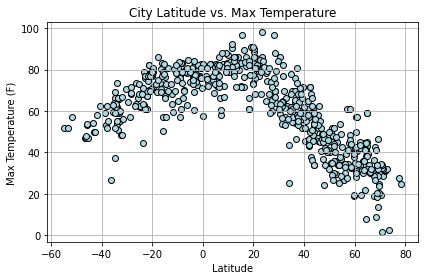

In [161]:
plt.scatter(city_df['Lat'],city_df['Max_temp'], marker='o',facecolors='lightblue', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.tight_layout()
plt.savefig('../output_data/latmax.png')
plt.show()


## Latitude vs. Humidity Plot

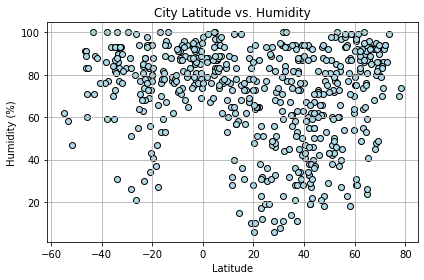

In [166]:
plt.scatter(city_df['Lat'],city_df['Humidity'], marker='o',facecolors='lightblue', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.savefig('../output_data/lathum.png')
plt.show()

## Latitude vs. Cloudiness Plot

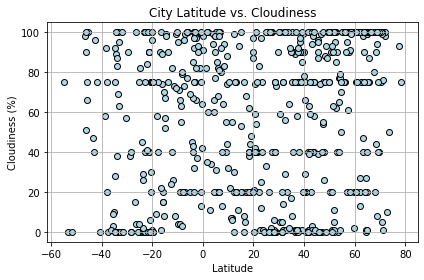

In [163]:
plt.scatter(city_df['Lat'],city_df['Cloudiness'], marker='o',facecolors='lightblue', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.savefig('../output_data/latclo.png')
plt.show()

## Latitude vs. Wind Speed Plot

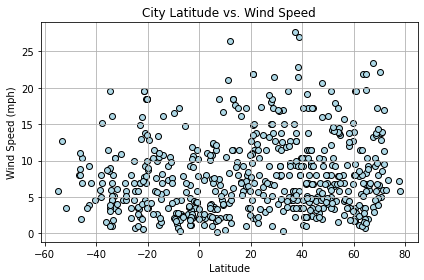

In [165]:
plt.scatter(city_df['Lat'],city_df['Wind_Speed'], marker='o',facecolors='lightblue', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.savefig('../output_data/latwin.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression